In [1]:
import networkx as nx
import numpy as np
import pandas as pd

In [2]:
with open('seoul.txt', 'r', encoding = "UTF-8") as file:
    S = file.read().split('\n')

In [3]:
class Edge:
    def __init__(self, u, v, w):
        self.u = u
        self.v = v
        self.w = w

V: 598, E: 1360
V: 598, E: 1360


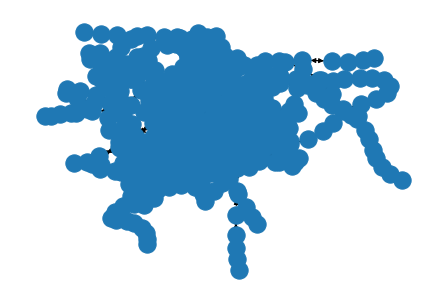

In [4]:
# 역번호 소멸
class Station:
    def __init__(self, stName: str, lineName: str):
        self.stName = stName
        self.lineName = lineName
    def __repr__(self):
        return self.stName
    def __eq__(self, o):
        return self.stName == o.stName
    def __hash__(self):
        return hash(self.stName)

stNo_to_st = {}
stName_to_st = {}

V = []
E = []
with open('seoul.txt', 'r', encoding = "UTF-8") as file:
    S = file.read().split('\n')
L = len(S)
for i in range(L):
    if S[i].strip() == '':
        break
    stNo, stName, lineName = S[i].split()
    st = stName_to_st.get(stName, Station(stName, lineName))
    stNo_to_st[stNo] = st
    stName_to_st[stName] = st

i += 1
for i in range(i, L):
    u, v, w = S[i].split();
    u = stNo_to_st[u]
    v = stNo_to_st[v]
    E.append(Edge(u, v, w))

for stName, st in stName_to_st.items():
    V.append(stName)

G = nx.MultiDiGraph()
G.add_nodes_from(V)
for e in E:
    G.add_edge(e.u.stName, e.v.stName, weight = e.w)

print("V: %d, E: %d" % (len(V), len(E)))
print("V: %d, E: %d" % (G.number_of_nodes(), G.number_of_edges()))
nx.draw(G)

V: 705, E: 1614
V: 705, E: 1614


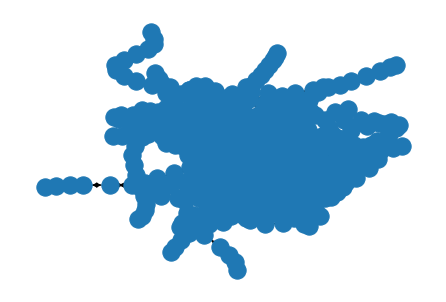

In [8]:
# 역번호를 살리는 쪽. 두 역을 잇는 2개의 방법(두개의 호선)이 존재할 때,
# 역의 고유번호가 다르므로 다른 쌍으로 인식시킬 수 있다. 그래서 Edges수가 감소하지 않은 것을 확인 가능
class Station:
    def __init__(self, stNo: str, stName: str, lineName: str):
        self.stNo = stNo
        self.stName = stName
        self.lineName = lineName
    def __repr__(self):
        return "%s(%s)" % (self.stName, self.stNo)
    def __eq__(self, o):
        return self.stNo == o.stNo
    def __hash__(self):
        return hash(self.stName)

stNo_to_st = {}
stName_to_st = {}

V = []
E = []
L = len(S)
for i in range(L):
    if S[i].strip() == '':
        break
    stNo, stName, lineName = S[i].split()
    st = Station(stNo, stName, lineName)
    V.append(st) # V
    stNo_to_st[stNo] = st
    stName_to_st[stName] = stName_to_st.get(stName, []) + [st]

i += 1
for i in range(i, L):
    u, v, w = S[i].split();
    u = stNo_to_st[u]
    v = stNo_to_st[v]
    E.append(Edge(u, v, w))

    
for stName, sts in stName_to_st.items():
    for i in sts:
        for j in sts:
            if i == j: continue
            E.append(Edge(i, j, 3))

G = nx.DiGraph()
G.add_nodes_from(V)
for e in E:
    G.add_edge(e.u, e.v, weight = e.w)

print("V: %d, E: %d" % (len(V), len(E)))
print("V: %d, E: %d" % (G.number_of_nodes(), G.number_of_edges()))
nx.draw(G)

In [9]:
G.adj[stNo_to_st['D12']]

AtlasView({판교(D11): {'weight': '4'}, 미금(D13): {'weight': '3'}, 정자(K230): {'weight': 3}})